In [1]:
from importlib import reload
from sklearn.metrics import confusion_matrix
import json
import numpy as np
import analysis

In [2]:
with open("/home/hoyeung/Documents/Matterport3DSimulator/tasks/R2R/data/R2R_val_seen.json", "rb") as f:
    raw_val_seen_ref = json.load(f)
    
with open("/home/hoyeung/Documents/Matterport3DSimulator/tasks/R2R/data/R2R_val_unseen.json", "rb") as f:
    raw_val_unseen_ref = json.load(f)

In [3]:
# construct scan id reference
ref_id_viewpt_val_seen = {ref['path_id']:ref['scan'] for ref in raw_val_seen_ref}
ref_id_viewpt_val_unseen = {ref['path_id']:ref['scan'] for ref in raw_val_unseen_ref}

In [4]:
with open("/home/hoyeung/blob_experiments/R2R/original_seq2seq_sampled/20191114_r2r_base/results/seq2seq_sample_imagenet_val_seen_iter_20000.json", "rb") as f:
    raw_val_seen = json.load(f)
    
with open("/home/hoyeung/blob_experiments/R2R/original_seq2seq_sampled/20191114_r2r_base/results/seq2seq_sample_imagenet_val_unseen_iter_20000.json", "rb") as f:
    raw_val_unseen = json.load(f)

In [5]:
for datapt in raw_val_seen:
    key = int(datapt['instr_id'].split("_")[0])
    scan = ref_id_viewpt_val_seen[key]
    datapt['scan'] = scan
    
for datapt in raw_val_unseen:
    key = int(datapt['instr_id'].split("_")[0])
    scan = ref_id_viewpt_val_unseen[key]
    datapt['scan'] = scan

In [6]:
val_seen = analysis.OutputData(raw_val_seen)
val_seen.compute_entropy_output_data()
val_seen.compute_cross_entropy_output_data()
val_seen.compute_nav_argmax_output_data()
val_seen.compute_softmax_output_data()

In [7]:
val_unseen = analysis.OutputData(raw_val_unseen)
val_unseen.compute_entropy_output_data()
val_unseen.compute_cross_entropy_output_data()
val_unseen.compute_nav_argmax_output_data()
val_unseen.compute_softmax_output_data()

In [8]:
val_seen[0].keys()

dict_keys(['agent_nav', 'trajectory', 'agent_nav_logits', 'instr_id', 'teacher_nav', 'scan', 'agent_nav_ent', 'agent_nav_cross_ent', 'agent_nav_argmax', 'agent_nav_softmax'])

## 1. Agent Nav Prediction (nav)

In [64]:
reload(analysis)

<module 'analysis' from '/data/home/hoyeung/Documents/Matterport3DSimulator/tasks/R2R/analysis.py'>

Action Type : nav
Action Reference : ['left', 'right', 'up', 'down', 'forward', '<end>']
Count val_seen = 18191
Count val_unseen = 44248


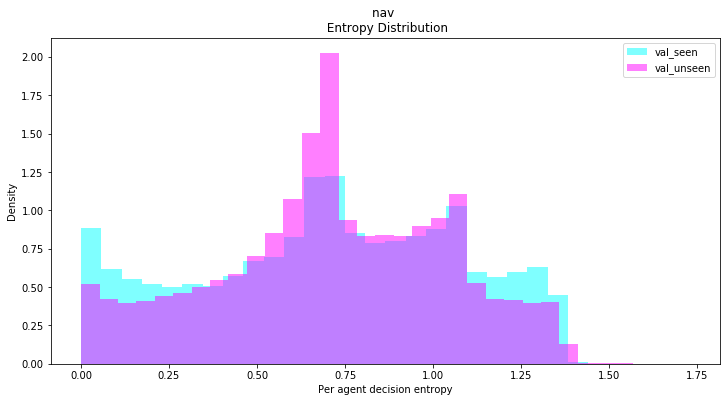

Count val_seen = 3996
Count val_unseen = 9467


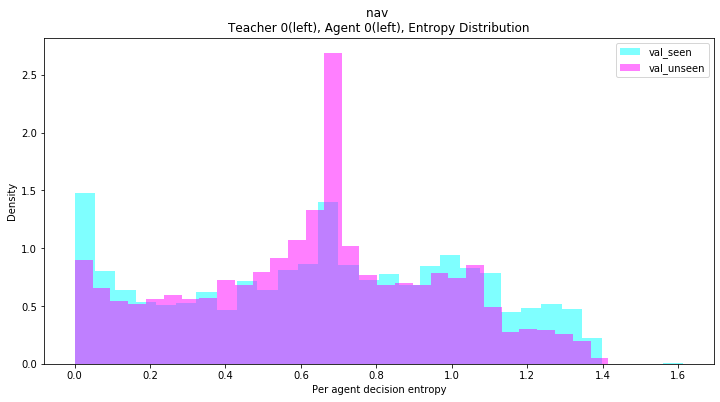

Count val_seen = 1452
Count val_unseen = 6086


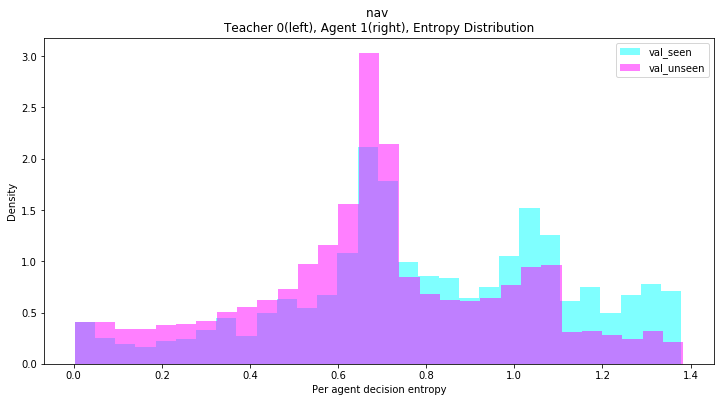

Count val_seen = 3
Count val_unseen = 15


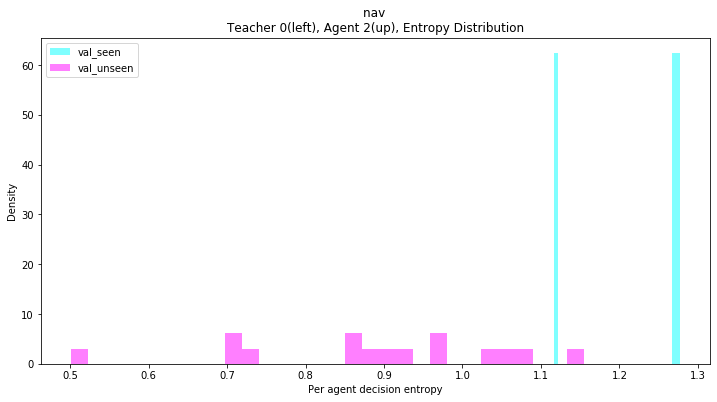

Count val_seen = 12
Count val_unseen = 30


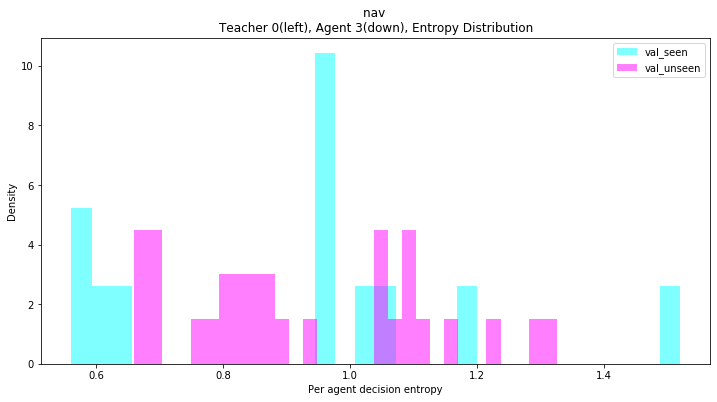

Count val_seen = 1248
Count val_unseen = 2840


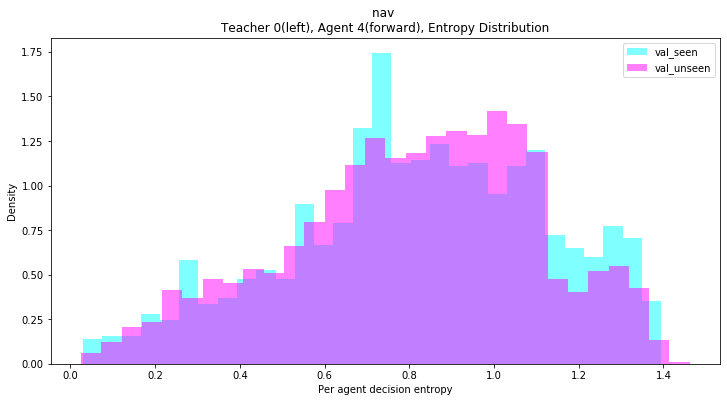

Count val_seen = 0
Count val_unseen = 0


/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6767: RuntimeWarning: invalid value encountered in true_divide
  m[:] = (m / db) / tops[-1].sum()


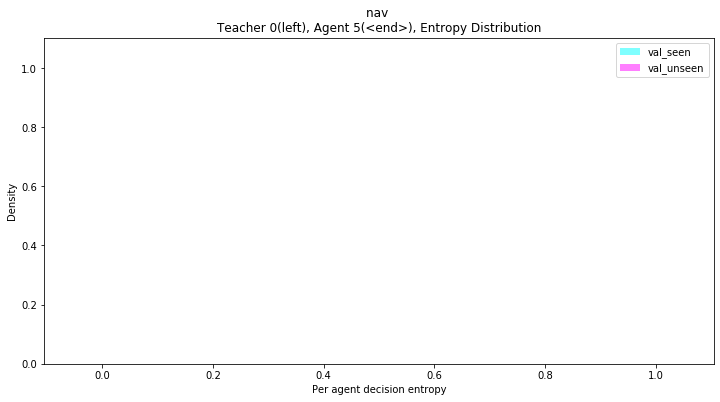

Count val_seen = 1673
Count val_unseen = 5739


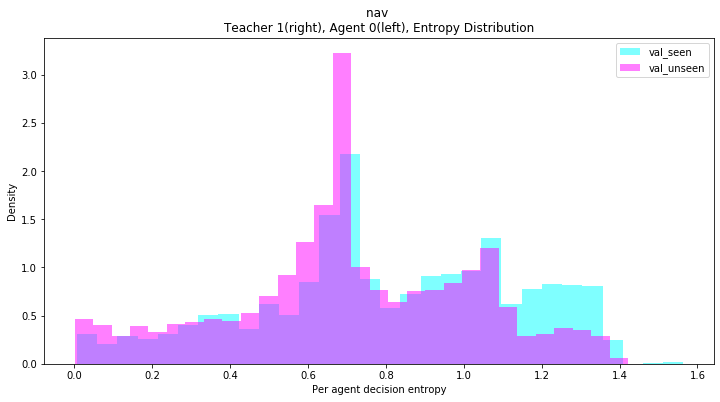

Count val_seen = 3872
Count val_unseen = 9027


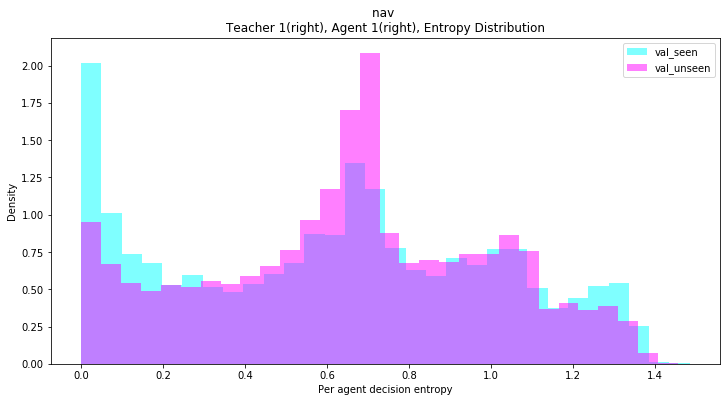

Count val_seen = 15
Count val_unseen = 12


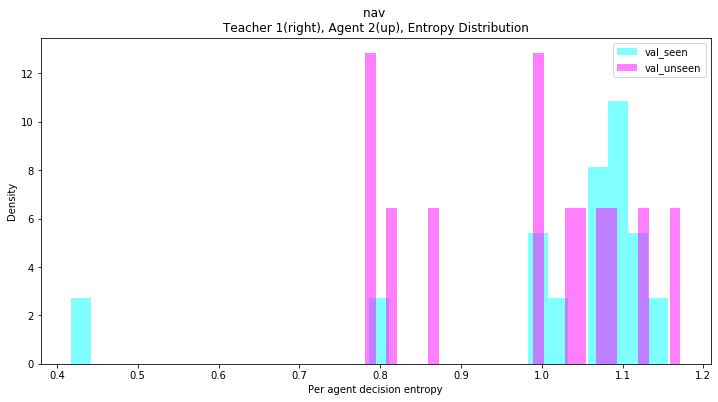

Count val_seen = 11
Count val_unseen = 8


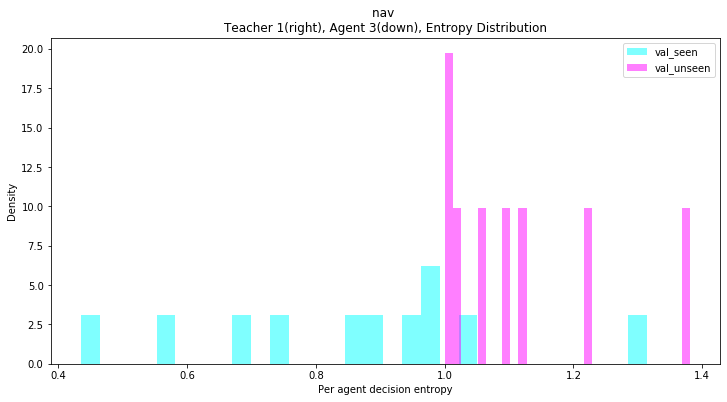

Count val_seen = 1121
Count val_unseen = 2939


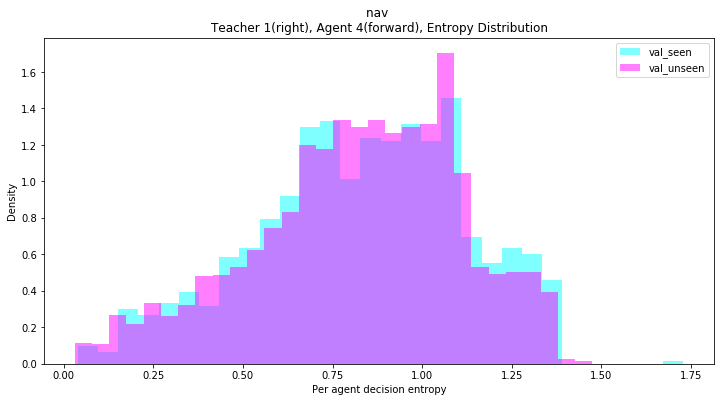

Count val_seen = 0
Count val_unseen = 0


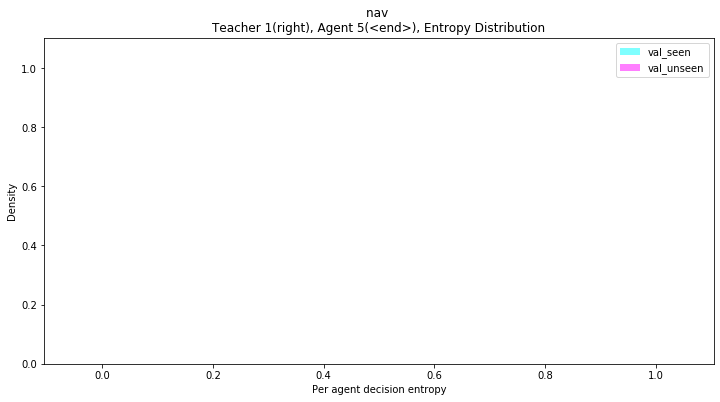

Count val_seen = 7
Count val_unseen = 21


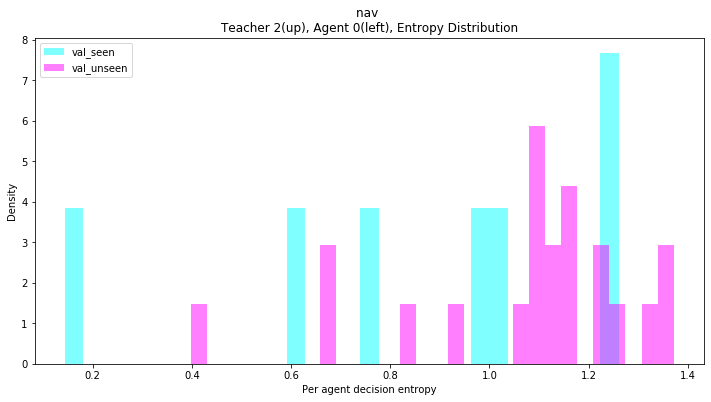

Count val_seen = 6
Count val_unseen = 36


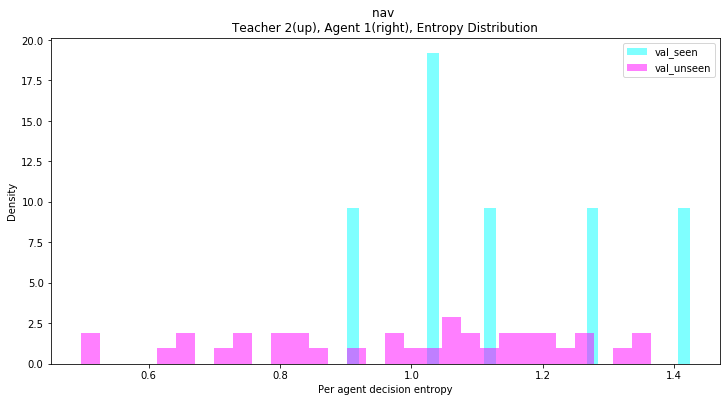

Count val_seen = 84
Count val_unseen = 75


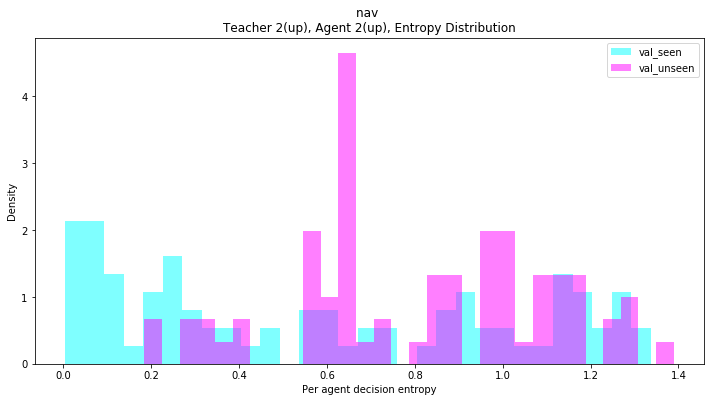

Count val_seen = 0
Count val_unseen = 0


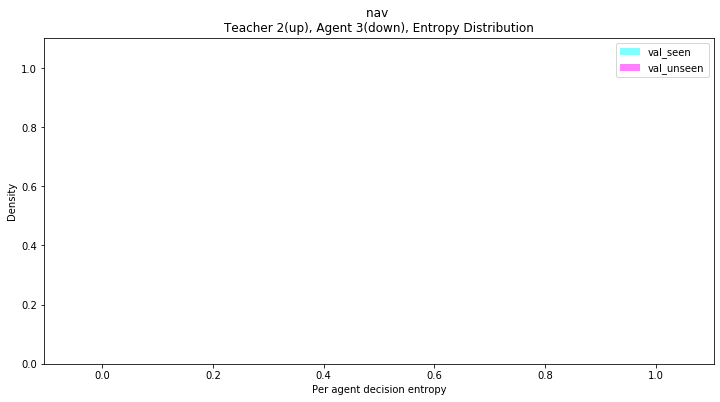

Count val_seen = 28
Count val_unseen = 112


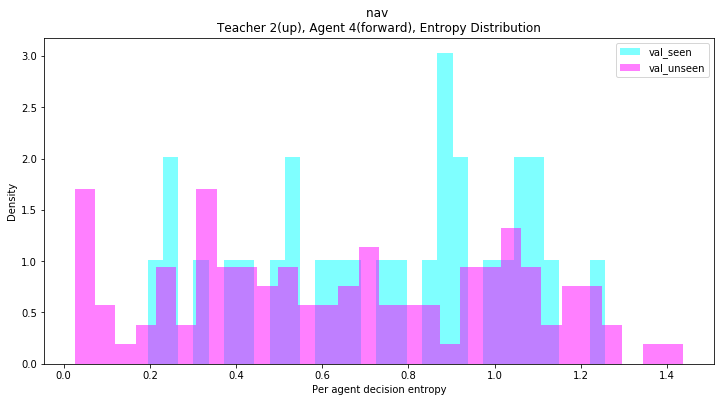

Count val_seen = 0
Count val_unseen = 0


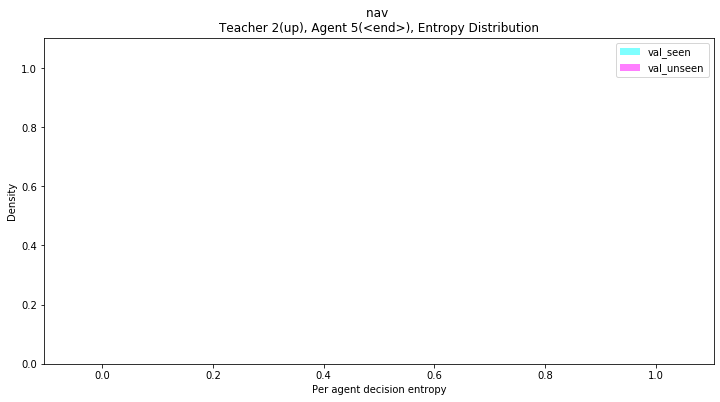

Count val_seen = 3
Count val_unseen = 34


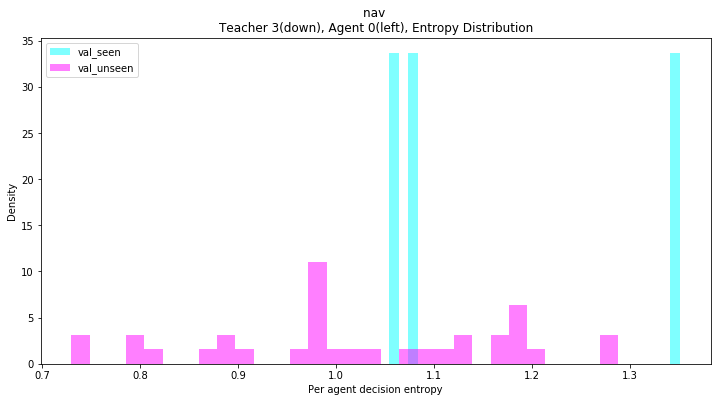

Count val_seen = 4
Count val_unseen = 64


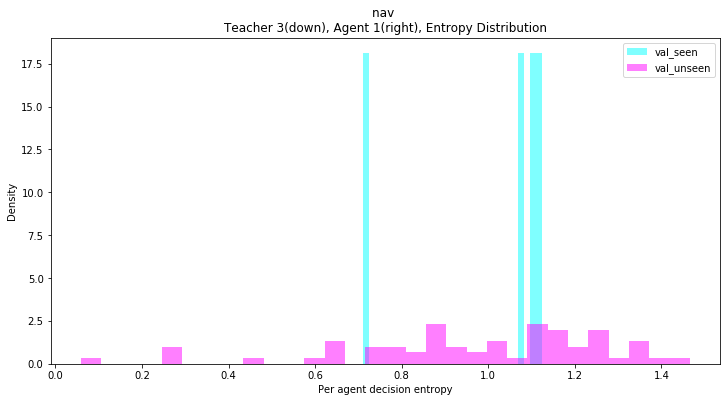

Count val_seen = 0
Count val_unseen = 0


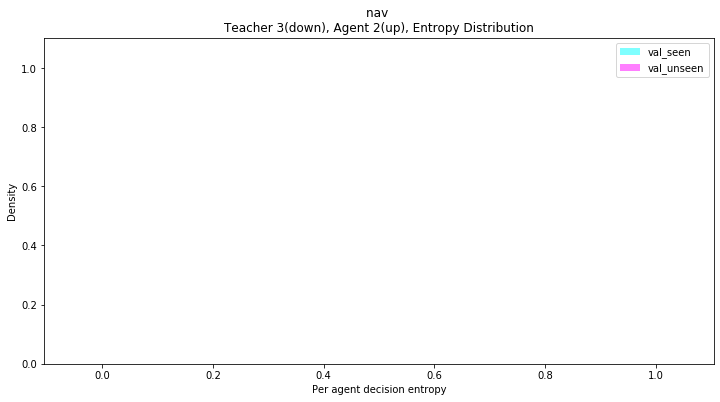

Count val_seen = 81
Count val_unseen = 63


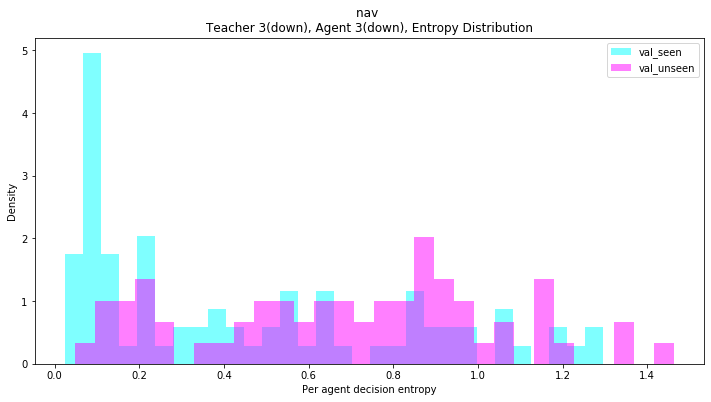

Count val_seen = 12
Count val_unseen = 80


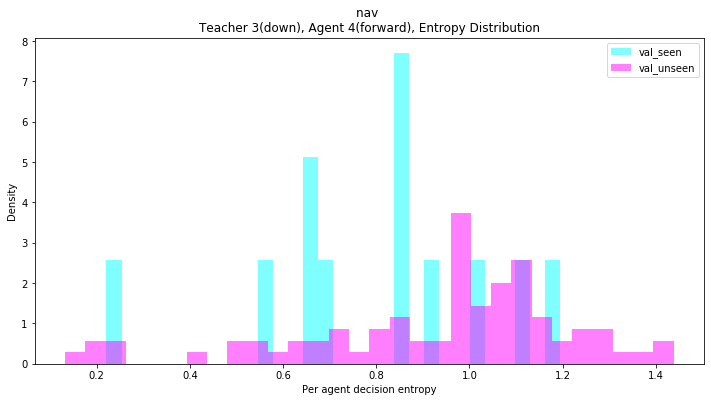

Count val_seen = 0
Count val_unseen = 0


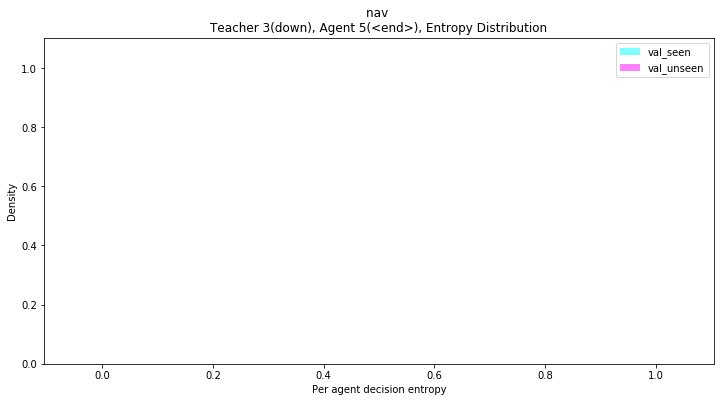

Count val_seen = 499
Count val_unseen = 1412


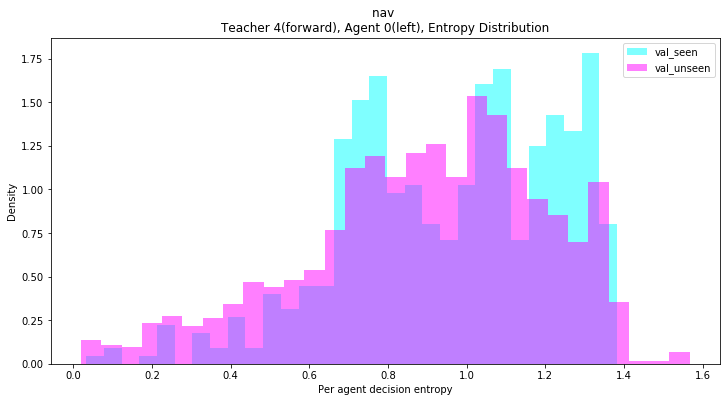

Count val_seen = 466
Count val_unseen = 1224


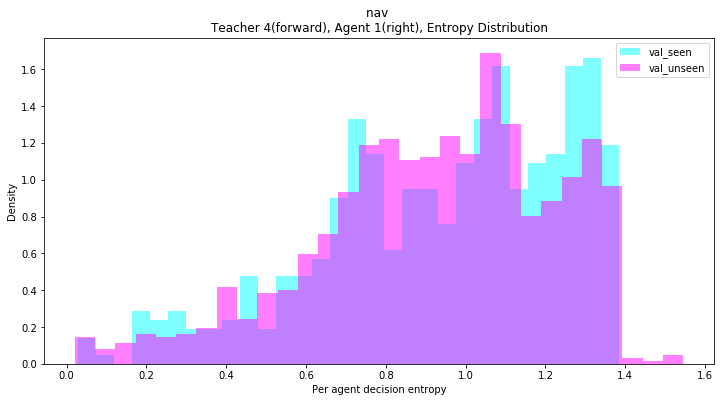

Count val_seen = 6
Count val_unseen = 21


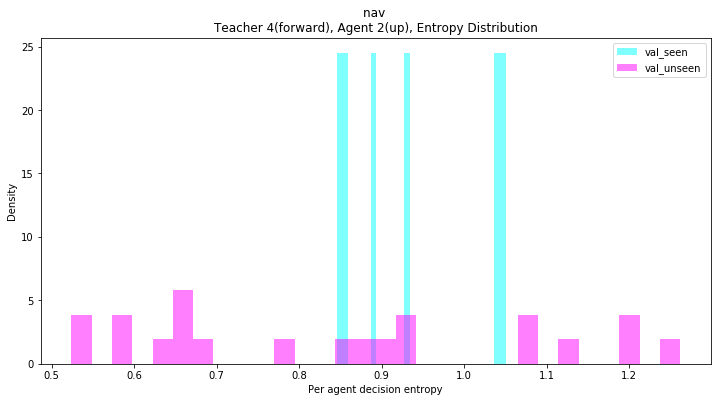

Count val_seen = 5
Count val_unseen = 17


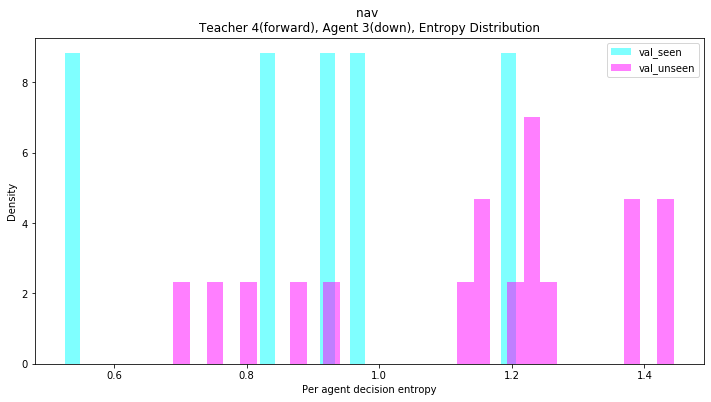

Count val_seen = 3074
Count val_unseen = 4057


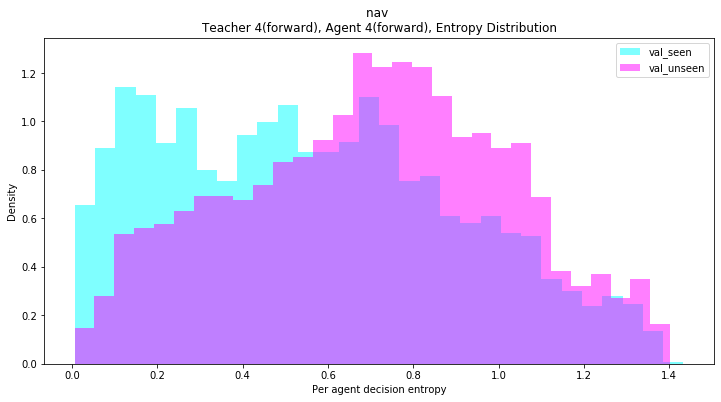

Count val_seen = 0
Count val_unseen = 0


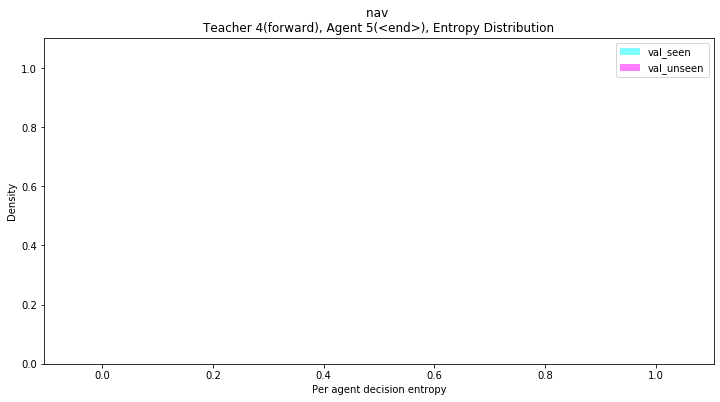

Count val_seen = 210
Count val_unseen = 307


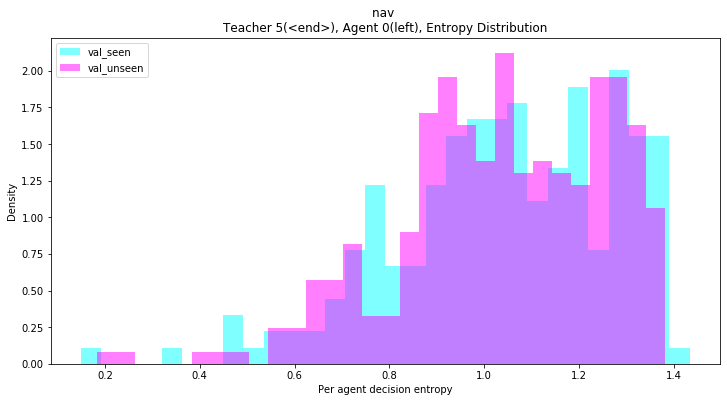

Count val_seen = 177
Count val_unseen = 368


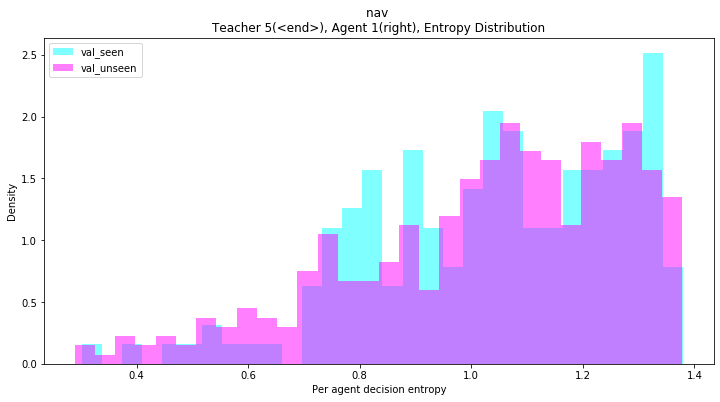

Count val_seen = 3
Count val_unseen = 2


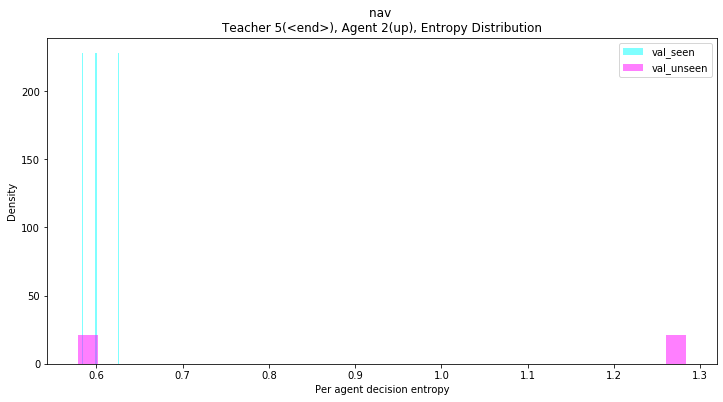

Count val_seen = 4
Count val_unseen = 4


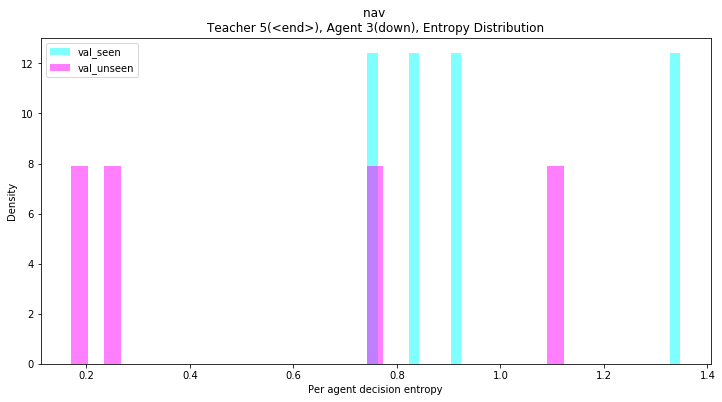

Count val_seen = 119
Count val_unseen = 188


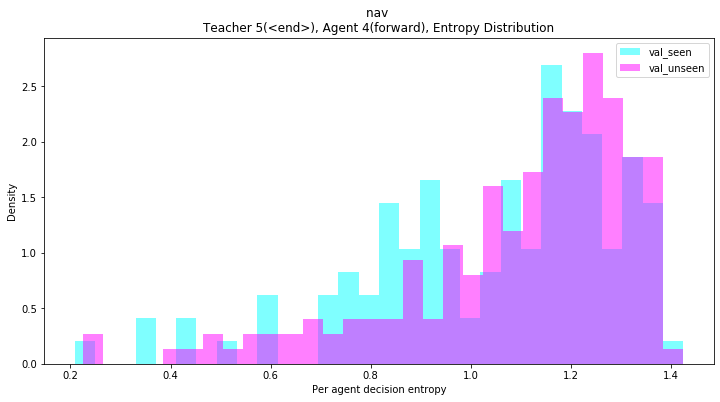

Count val_seen = 0
Count val_unseen = 0


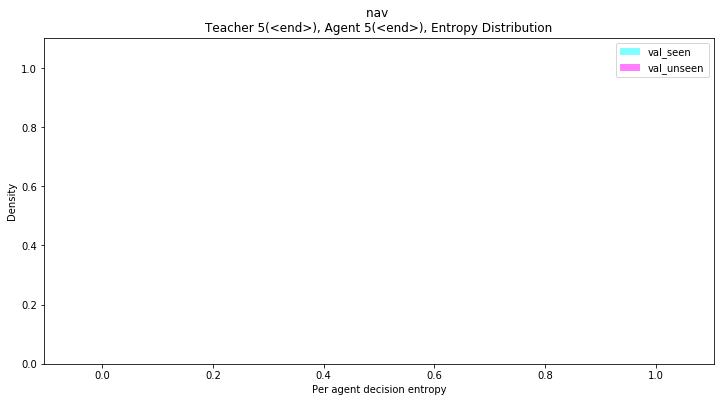

In [9]:
analysis.PlotUtils.plot_entropy_by_action_type(
    output_data_list=[val_seen, val_unseen],
    output_data_labels=["val_seen", "val_unseen"],
    action_type = "nav",
    cross_ent_bool=False, action_reference=None
)

## Confusion Matrix

In [10]:
nav_class_names = ['left', 'right', 'up', 'down', 'forward', '<end>']

#val seen on nav1
val_seen_nav_true, val_seen_nav_pred, _, _ = analysis.PlotUtils.flatten_targets_argmaxes_entropies_timesteps(data=val_seen, action_type="nav", cross_ent_bool=False)
#val unseen on nav1
val_unseen_nav_true, val_unseen_nav_pred, _, _ = analysis.PlotUtils.flatten_targets_argmaxes_entropies_timesteps(data=val_unseen, action_type="nav", cross_ent_bool=False)

Normalized confusion matrix
[[5.95440322e-01 2.16361198e-01 4.47027269e-04 1.78810907e-03
  1.85963344e-01 0.00000000e+00]
 [2.50000000e-01 5.78601315e-01 2.24148237e-03 1.64375374e-03
  1.67513449e-01 0.00000000e+00]
 [5.60000000e-02 4.80000000e-02 6.72000000e-01 0.00000000e+00
  2.24000000e-01 0.00000000e+00]
 [3.00000000e-02 4.00000000e-02 0.00000000e+00 8.10000000e-01
  1.20000000e-01 0.00000000e+00]
 [1.23209877e-01 1.15061728e-01 1.48148148e-03 1.23456790e-03
  7.59012346e-01 0.00000000e+00]
 [4.09356725e-01 3.45029240e-01 5.84795322e-03 7.79727096e-03
  2.31968811e-01 0.00000000e+00]]


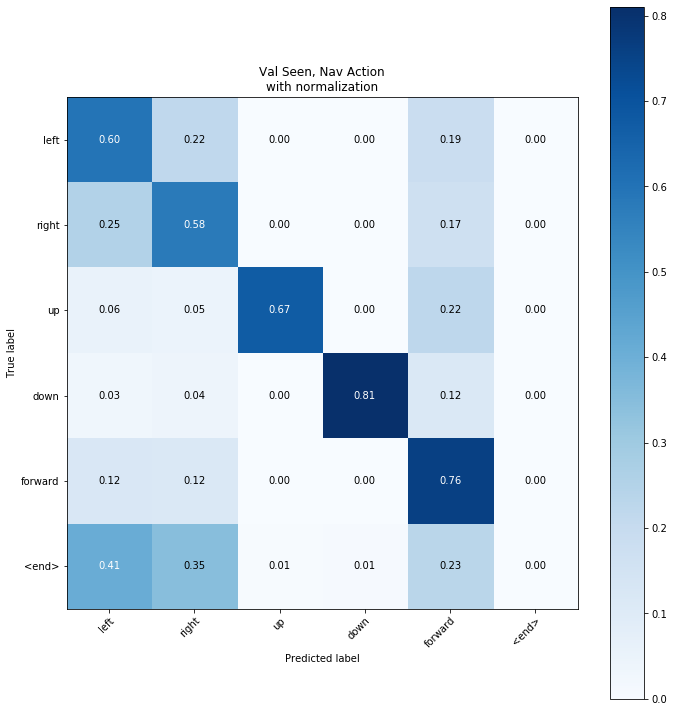

In [11]:
class_names = nav_class_names

# Plot non-normalized confusion matrix
analysis.PlotUtils.plot_confusion_matrix(y_true=val_seen_nav_true, 
                               y_pred=val_seen_nav_pred, 
                               classes=class_names,
                               title='Val Seen, Nav Action\nwith normalization',
                               normalize=True)

Normalized confusion matrix
[[5.13450483e-01 3.30079184e-01 8.13537260e-04 1.62707452e-03
  1.54029721e-01 0.00000000e+00]
 [3.23779972e-01 5.09280677e-01 6.77009873e-04 4.51339915e-04
  1.65811001e-01 0.00000000e+00]
 [8.60655738e-02 1.47540984e-01 3.07377049e-01 0.00000000e+00
  4.59016393e-01 0.00000000e+00]
 [1.41078838e-01 2.65560166e-01 0.00000000e+00 2.61410788e-01
  3.31950207e-01 0.00000000e+00]
 [2.09775665e-01 1.81845194e-01 3.11989303e-03 2.52562769e-03
  6.02733621e-01 0.00000000e+00]
 [3.53279632e-01 4.23475259e-01 2.30149597e-03 4.60299194e-03
  2.16340621e-01 0.00000000e+00]]


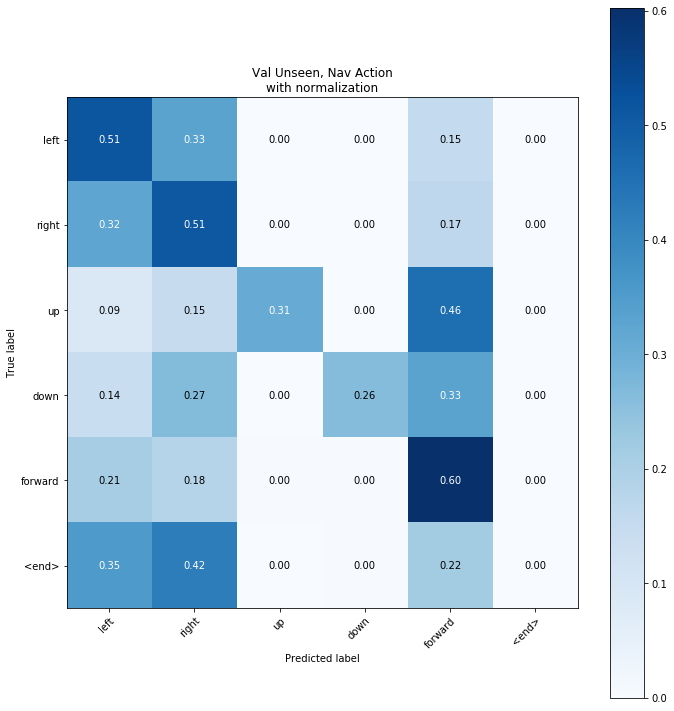

In [12]:
class_names = nav_class_names

# Plot non-normalized confusion matrix
analysis.PlotUtils.plot_confusion_matrix(y_true=val_unseen_nav_true, 
                               y_pred=val_unseen_nav_pred, 
                               classes=class_names,
                               title='Val Unseen, Nav Action\nwith normalization',
                               normalize=True)

## grouped bar chart

Action Type : nav
Action Reference : ['left', 'right', 'up', 'down', 'forward', '<end>']


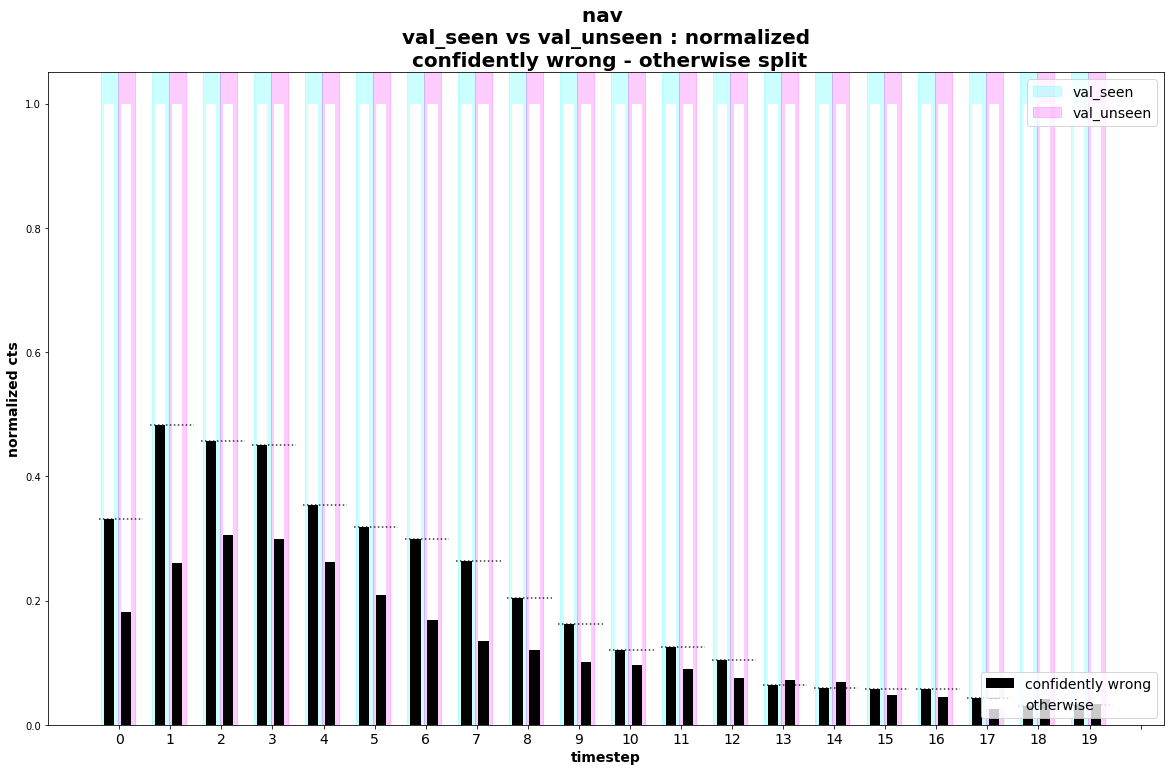

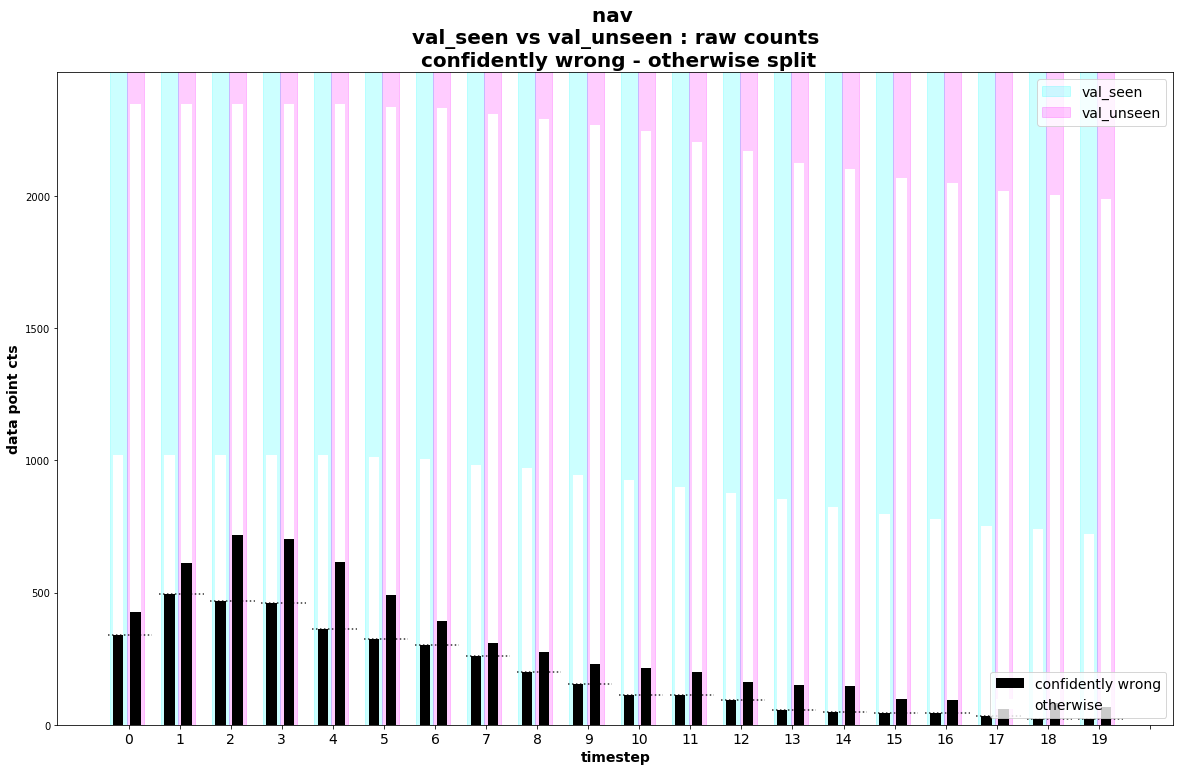

In [14]:
analysis.PlotUtils.plot_bad_decisions_by_action_type(
    output_data_list=[val_seen, val_unseen],
    output_data_labels=["val_seen", "val_unseen"],
    action_type = "nav",
    action_reference=None,
    timestep_specific=True,
    room_specific=False,
    cutoff_denom=4
)

Action Type : nav
Action Reference : ['left', 'right', 'up', 'down', 'forward', '<end>']


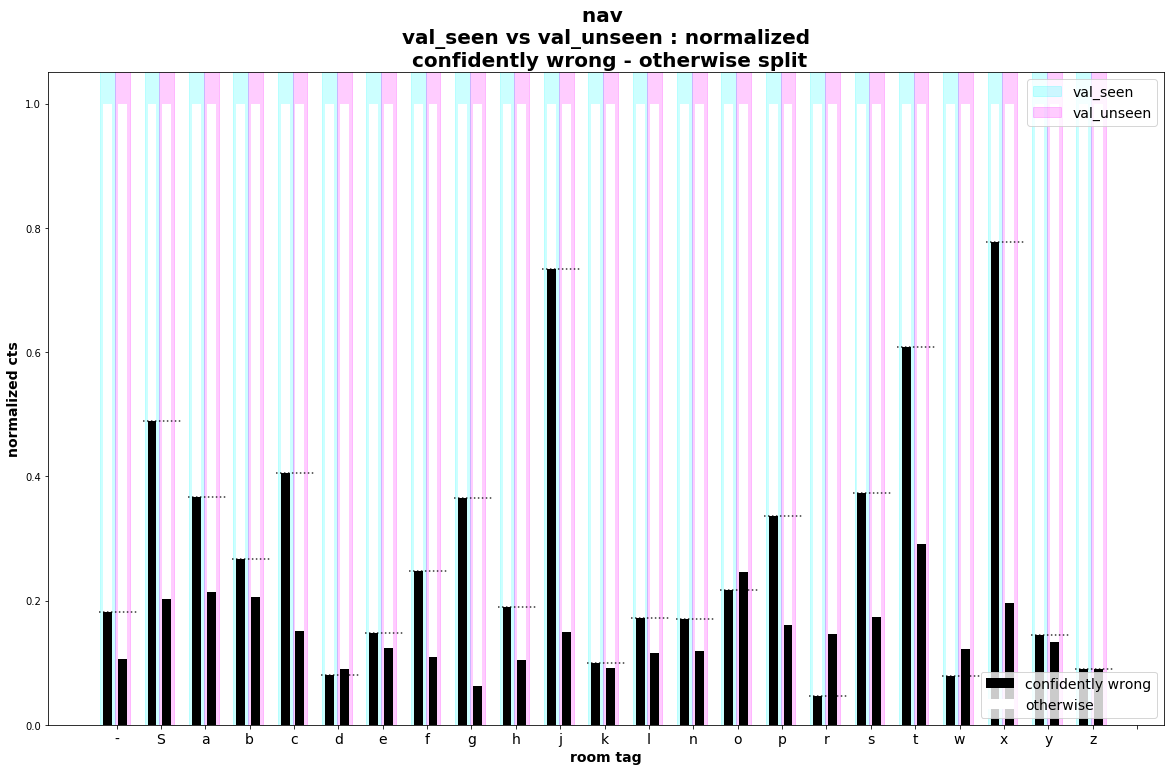

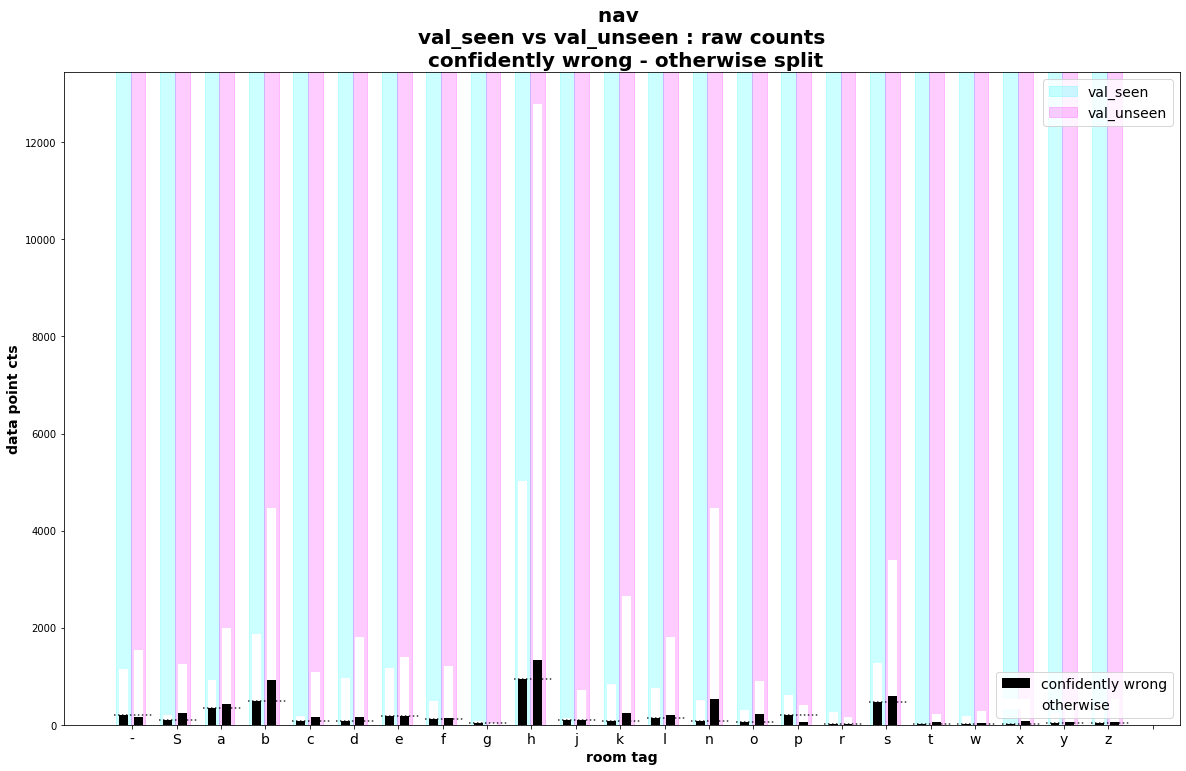

In [15]:
reload(analysis)

analysis.PlotUtils.plot_bad_decisions_by_action_type(
    output_data_list=[val_seen, val_unseen],
    output_data_labels=["val_seen", "val_unseen"],
    action_type = "nav",
    action_reference=None,
    timestep_specific=False,
    room_specific=True,
    cutoff_denom=4
)

## Calibration plots

Action Type : nav
Action Reference : ['left', 'right', 'up', 'down', 'forward', '<end>']


/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


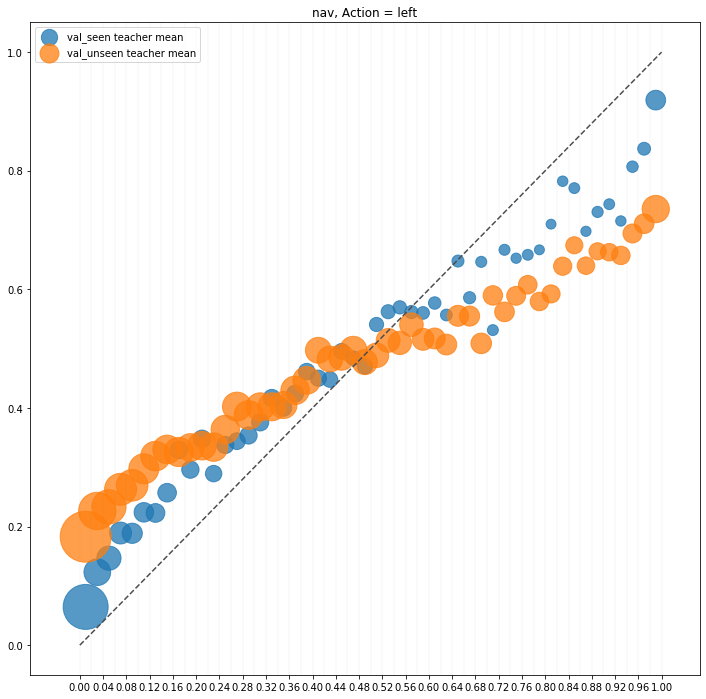

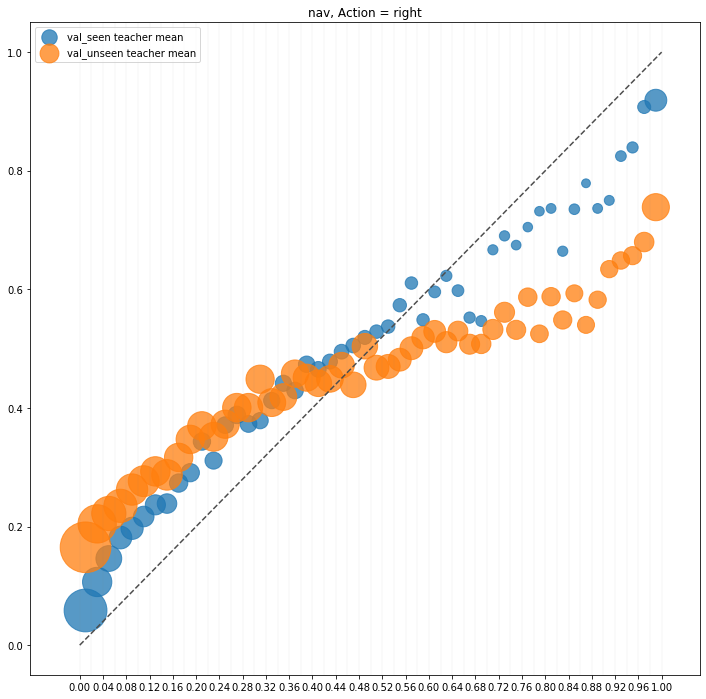

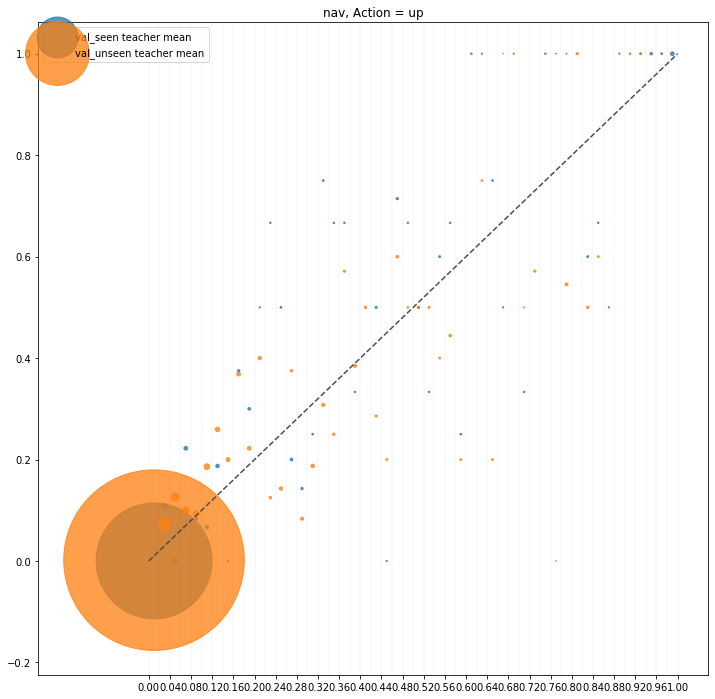

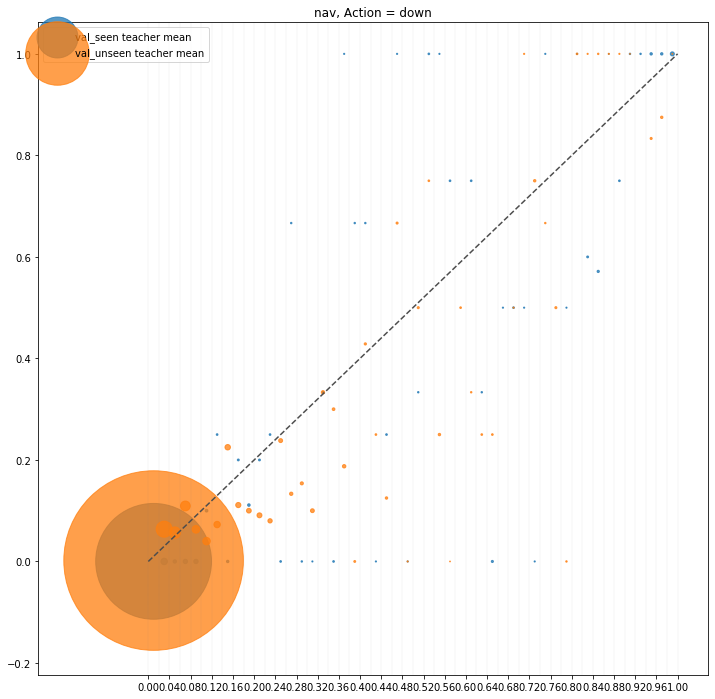

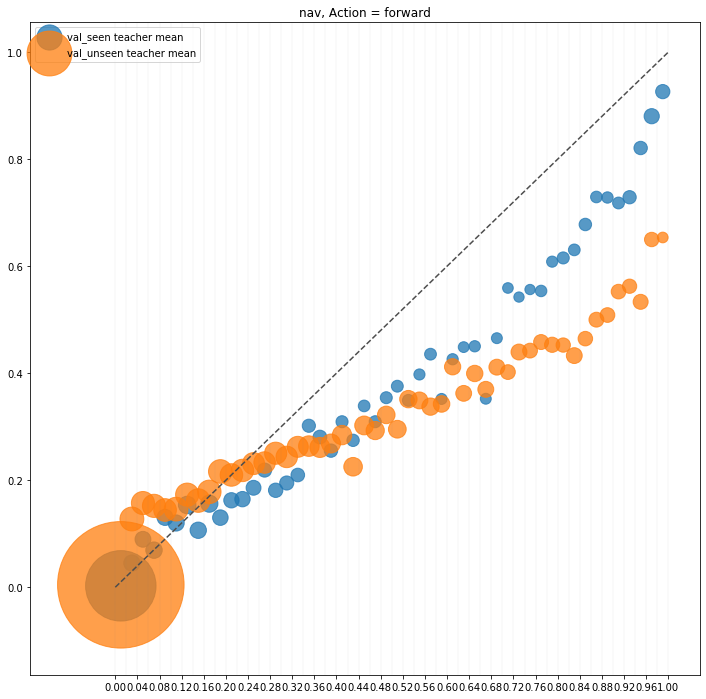

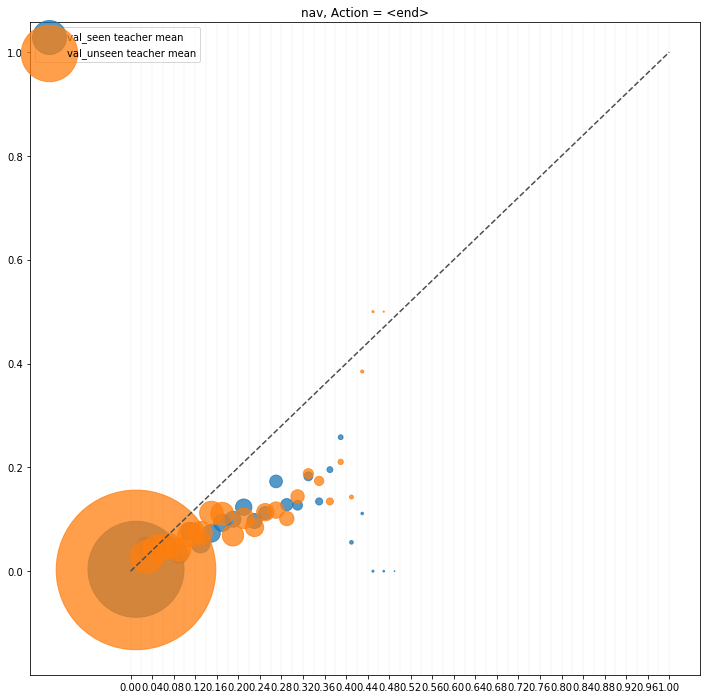

In [16]:
reload(analysis)
dum = analysis.PlotUtils.plot_calibration_graph_by_action_type(
    output_data_list=[val_seen, val_unseen],
    output_data_labels=["val_seen", "val_unseen"],
    action_type = "nav",
    action_reference=None,
    time_step_specific=False,
    num_bins=50
)